<a href="https://colab.research.google.com/github/chiaki-tachikawa/ML-projects/blob/main/HeartAttack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
data=pd.read_csv('/Medicaldataset.csv')

In [50]:
data.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


Clean the data

In [51]:
#Check null data
data.isnull().sum()

,0
Age,0
Gender,0
Heart rate,0
Systolic blood pressure,0
Diastolic blood pressure,0
Blood sugar,0
CK-MB,0
Troponin,0
Result,0


In [52]:
#data info
data.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [69]:
#remove outliers in heart rate
data=data[data['Heart rate']<200]

In [70]:
print(data["Heart rate"].value_counts())
print(data["Heart rate"].unique())
# Fix: Use correct dictionary syntax and align indexes
heart_rate_df = pd.DataFrame({
    "Heart rate": data["Heart rate"].unique(),
    "Count": data["Heart rate"].value_counts().reindex(data["Heart rate"].unique())
})
heart_rate_df.sort_index(inplace=True)
heart_rate_df.head()


Heart rate
60     95
61     57
70     48
64     47
80     46
       ..
107     1
49      1
46      1
36      1
45      1
Name: count, Length: 78, dtype: int64
[ 66  94  64  70  61  40  60  76  81  73  72  92 135  63  65 125  62  58
  93  96  95  97  91  87  77  80  82  83  78  90  59  57  98 102 103 105
  74  85  75  71  68  67  56  89  88  86  79 100  69  84 110 120 122 119
 116 114  55  53  54 117 112 108 134 111 101 113  51  52  99 132  50 107
 104  49  46  20  36  45]


,Heart rate,Count
Heart rate,,
20,20,2
36,36,1
40,40,4
45,45,1
46,46,1


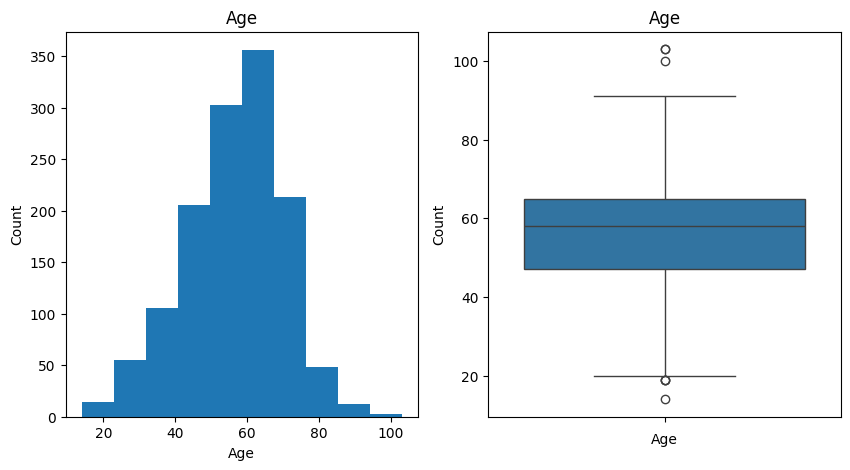

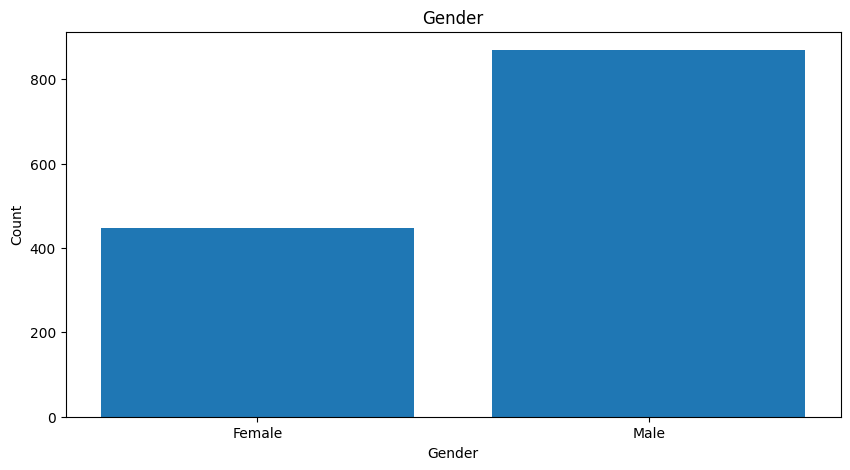

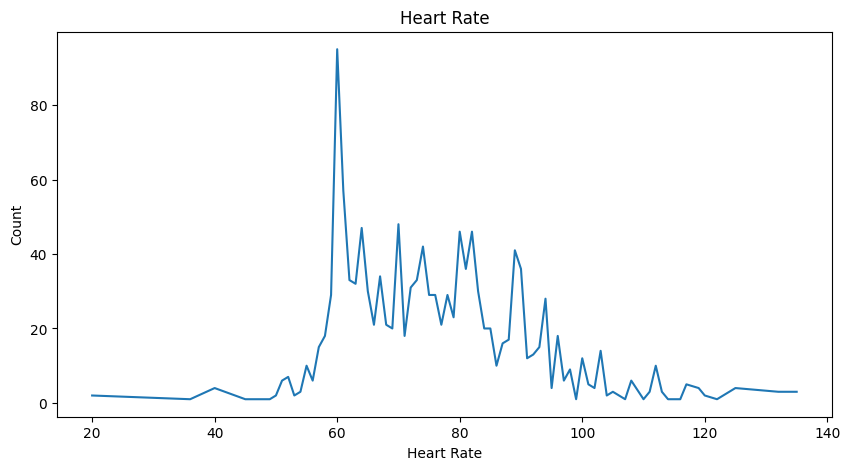

In [71]:
#visualise Age
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.hist(data.Age)
plt.subplot(1,2,2)
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Count')
sns.boxplot(data.Age)
plt.show()

#visualise Gender
custom_label=["Male","Female"]
plt.figure(figsize=(10,5))
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(data["Gender"].unique(),labels=custom_label)
plt.bar(data["Gender"].unique(),data["Gender"].value_counts())
plt.show()

#Visualise Heart Rate
plt.figure(figsize=(10,5))
plt.title('Heart Rate')
plt.xlabel('Heart Rate')
plt.ylabel('Count')
plt.plot(heart_rate_df["Heart rate"],heart_rate_df['Count'])
plt.show()

The histram is slightly right skewed. The highest age is around 60. After that, the graph is significantly dropped.

The count of Female is almost half amount of Male.